In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [ ]:
APPLE = pd.read_csv("AAPL.csv")
BTC = pd.read_csv("BTC-USD.csv")
IDEA = pd.read_csv("IDEA.NS.csv")
MATIC = pd.read_csv("MATIC-USD.csv")
MINDA = pd.read_csv("MINDACORP.NS.csv")
MRNA = pd.read_csv("MRNA.csv")
AMAZON = pd.read_csv("AMZN.csv")
PIDILITE = pd.read_csv("PIDILITIND.NS.csv")
QQQ = pd.read_csv("QQQ.csv")
TESLA = pd.read_csv("TSLA.csv")
SP500 = pd.read_csv("SPY.csv")

APPLE = APPLE[["Date", "Adj Close"]]
BTC = BTC[["Date", "Adj Close"]]
IDEA = IDEA[["Date", "Adj Close"]]
MATIC = MATIC[["Date", "Adj Close"]]
MINDA = MINDA[["Date", "Adj Close"]]
MRNA = MRNA[["Date", "Adj Close"]]
AMAZON = AMAZON[["Date", "Adj Close"]]
PIDILITE = PIDILITE[["Date", "Adj Close"]]
QQQ = QQQ[["Date", "Adj Close"]]
TESLA = TESLA[["Date", "Adj Close"]]
SP500 = SP500[["Date", "Adj Close"]]

APPLE.rename(columns = {"Adj Close": "APPLE"}, inplace = True)
BTC.rename(columns={"Adj Close": "BTC"}, inplace = True)
IDEA.rename(columns={"Adj Close": "IDEA"}, inplace = True)
MATIC.rename(columns={"Adj Close": "MATIC"}, inplace = True)
MINDA.rename(columns={"Adj Close": "MINDA"}, inplace = True)
MRNA.rename(columns={"Adj Close": "MRNA"}, inplace = True)
AMAZON.rename(columns={"Adj Close": "AMAZON"}, inplace = True)
PIDILITE.rename(columns={"Adj Close": "PIDILITE"}, inplace = True)
QQQ.rename(columns={"Adj Close": "QQQ"}, inplace = True)
TESLA.rename(columns={"Adj Close": "TESLA"}, inplace = True)
SP500.rename(columns={"Adj Close": "SP500"}, inplace = True)

In [ ]:
stocks_df = pd.concat([APPLE, BTC.drop(columns=["Date"]), IDEA.drop(columns=["Date"]), MATIC.drop(columns=["Date"]), MINDA.drop(columns=["Date"]),
                       MRNA.drop(columns=["Date"]), AMAZON.drop(columns=["Date"]), PIDILITE.drop(columns=["Date"]),
                       QQQ.drop(columns=["Date"]), TESLA.drop(columns=["Date"]), SP500.drop(columns=["Date"])], axis = 1)

stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df.head(5)

,Date,APPLE,BTC,IDEA,MATIC,MINDA,MRNA,AMAZON,PIDILITE,QQQ,TESLA,SP500
0,2019-02-22,41.629517,3954.118164,18.692039,1.384936,195.589005,160.089996,94.580002,2322.052246,292.012421,19.415333,255.660934
1,2019-02-25,41.932751,4005.526611,18.300110,1.397024,194.692490,158.169998,95.790001,2285.008545,292.230865,19.647333,257.246002
2,2019-02-26,41.956825,4142.526855,18.390554,1.354701,197.431824,147.570007,95.820000,2258.619873,294.783264,19.917999,257.596191
3,2019-02-27,42.086788,3810.427490,17.968475,1.265957,196.037247,139.259995,93.500000,2266.138184,289.847351,19.857332,257.411926
4,2019-02-28,41.672817,3882.696289,17.817734,1.248850,191.953140,138.270004,93.760002,2270.071533,291.923065,20.982668,257.301361


In [ ]:
def normalize_stocks(df):
    df_ = df.copy()
    for stock in df_.columns[1:]:
        df_[stock] = df_[stock] / df_.loc[0, stock]
    return df_

norm_stocks_df = normalize_stocks(stocks_df)
norm_stocks_df.head(5)

,Date,APPLE,BTC,IDEA,MATIC,MINDA,MRNA,AMAZON,PIDILITE,QQQ,TESLA,SP500
0,2019-02-22,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2019-02-25,1.007284,1.013001,0.979032,1.008728,0.995416,0.988007,1.012793,0.984047,1.000748,1.011949,1.006200
2,2019-02-26,1.007862,1.047649,0.983871,0.978169,1.009422,0.921794,1.013111,0.972683,1.009489,1.025890,1.007570
3,2019-02-27,1.010984,0.963661,0.961290,0.914091,1.002292,0.869886,0.988581,0.975920,0.992586,1.022765,1.006849
4,2019-02-28,1.001040,0.981937,0.953226,0.901738,0.981411,0.863702,0.991330,0.977614,0.999694,1.080727,1.006416


In [ ]:
fig = px.line(title = "Normalized stock prices")

for stock in norm_stocks_df.columns[1:]:
    fig.add_scatter(x = norm_stocks_df["Date"], y = norm_stocks_df[stock], name = stock)
fig.show()

In [ ]:
def daily_return_estimator(df):
    df_daily_return = df.copy()

    for i in df.columns[1:]:
        for j in range(1, len(df)):
            df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100

        df_daily_return.loc[0, i] = 0

    return df_daily_return

In [ ]:
stocks_daily_return = daily_return_estimator(stocks_df)
stocks_daily_return.head(5)

,Date,APPLE,BTC,IDEA,MATIC,MINDA,MRNA,AMAZON,PIDILITE,QQQ,TESLA,SP500
0,2019-02-22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2019-02-25,0.728411,1.300124,-2.096770,0.872820,-0.458367,-1.199324,1.279339,-1.595300,0.074806,1.194932,0.619988
2,2019-02-26,0.057411,3.420280,0.494227,-3.029511,1.407005,-6.701645,0.031317,-1.154861,0.873419,1.377622,0.136130
3,2019-02-27,0.309754,-8.016831,-2.295086,-6.550818,-0.706359,-5.631234,-2.421206,0.332872,-1.674421,-0.304584,-0.071533
4,2019-02-28,-0.983613,1.896606,-0.838919,-1.351310,-2.083332,-0.710894,0.278077,0.173571,0.716140,5.667106,-0.042953


Text(0.5, 1.0, 'Daily returns of the stocks')

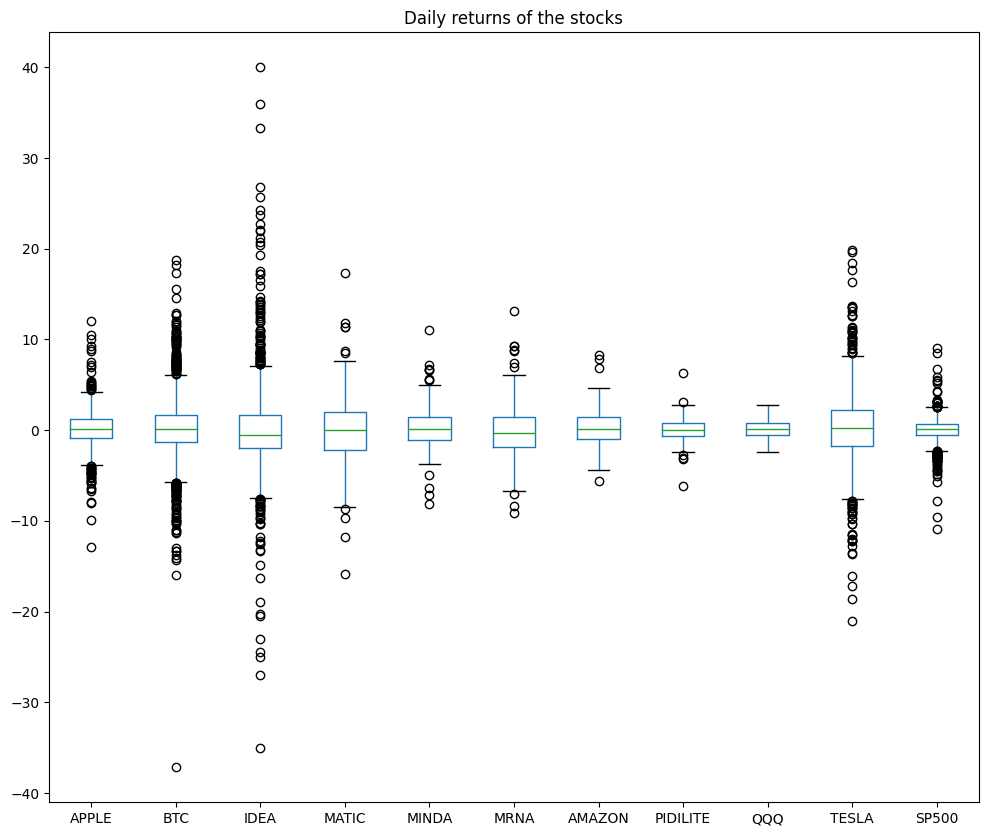

In [ ]:
stocks_daily_return.boxplot(figsize=(12, 10), grid=False)
plt.title("Daily returns of the stocks")

Text(0.5, 1.0, 'Daily returns of the stocks')

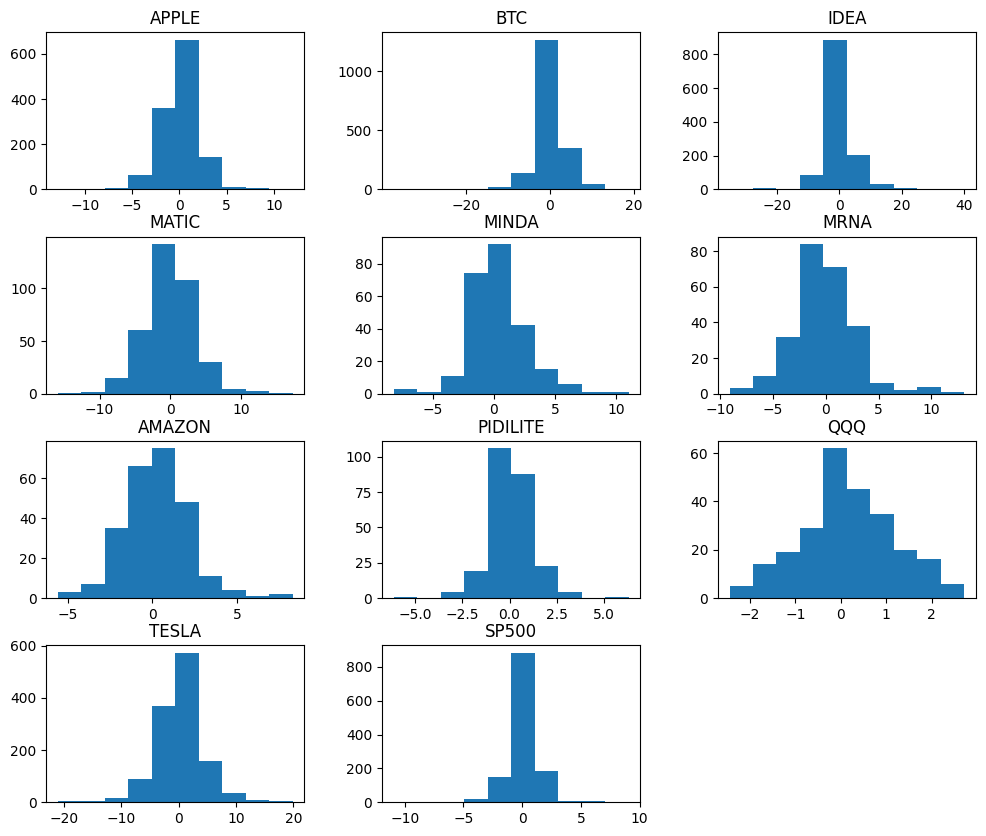

In [ ]:
stocks_daily_return.hist(figsize=(12, 10), grid=False)
plt.title("Daily returns of the stocks")

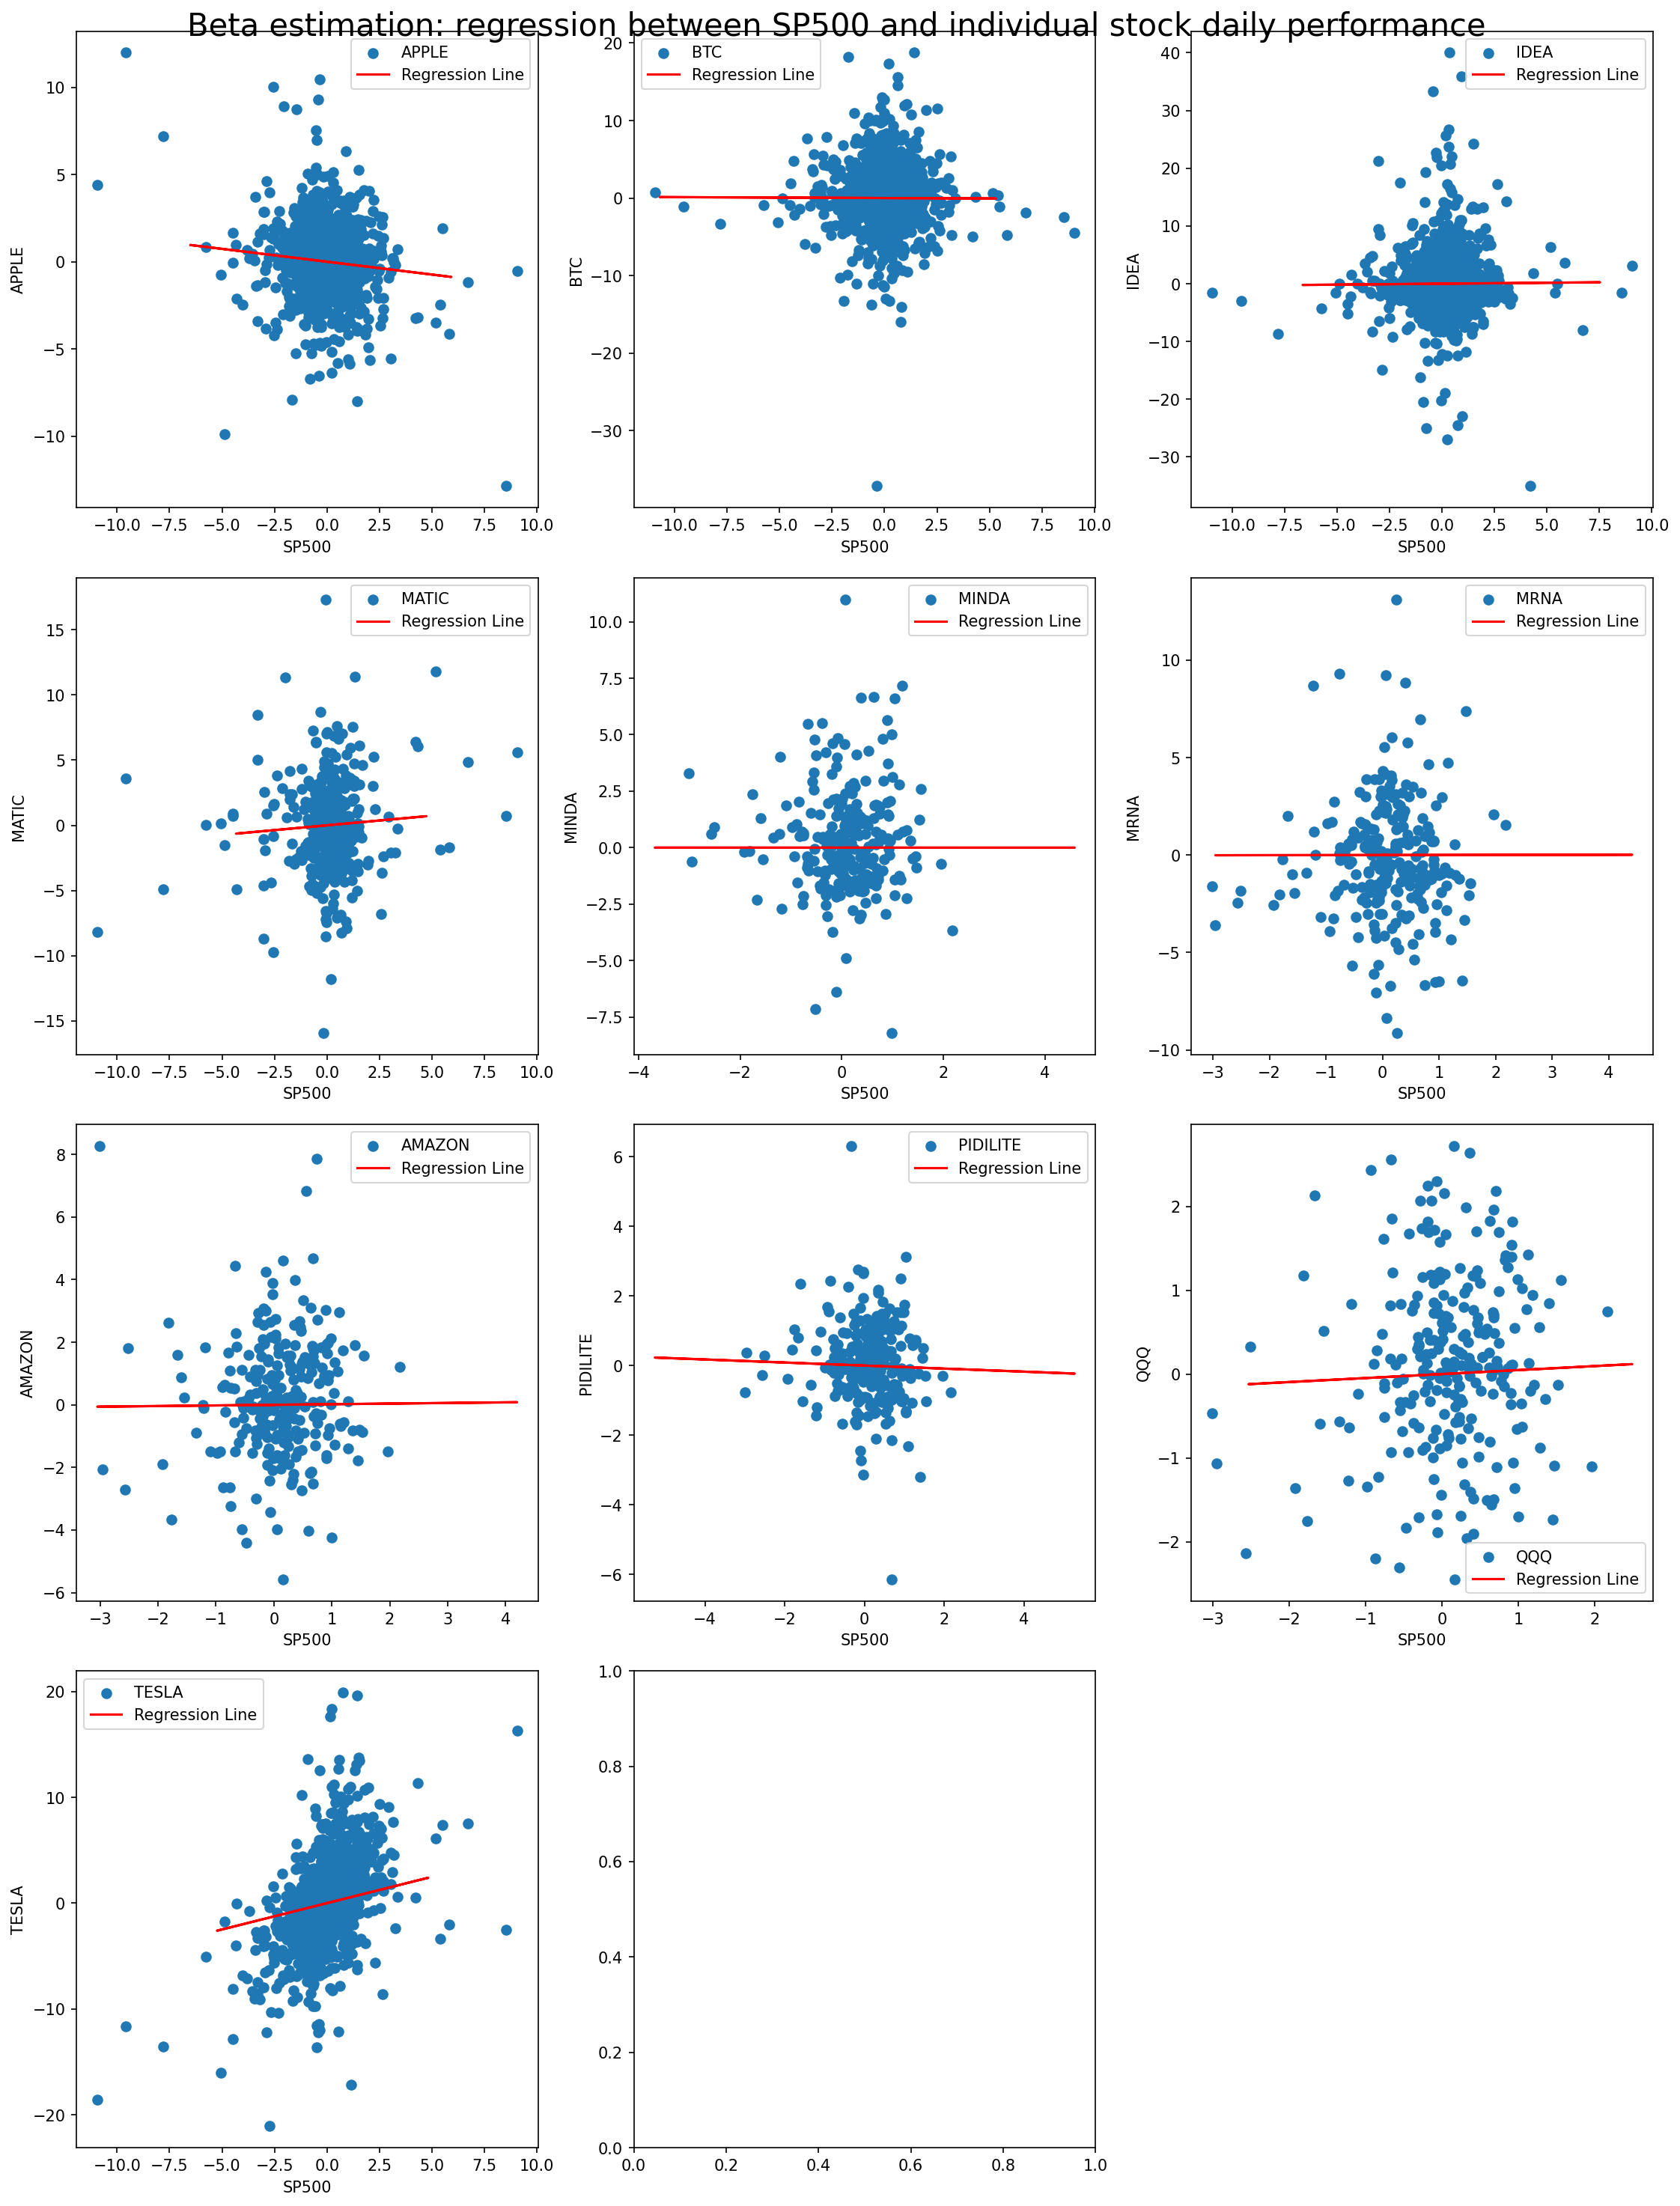

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

beta, alpha = dict(), dict()

num_assets = len(stocks_daily_return.columns) - 1
num_subplots_per_row = 3
num_rows = (num_assets + num_subplots_per_row - 1) // num_subplots_per_row
fig, axes = plt.subplots(num_rows, num_subplots_per_row, dpi=150, figsize=(15, 5*num_rows))

axes = axes.flatten()

for idx, stock in enumerate(stocks_daily_return.columns):
    if stock != "Date" and stock != "SP500":
        subplot_idx = idx - 1 if idx > 0 else 0

        axes[subplot_idx].scatter(stocks_daily_return["SP500"], stocks_daily_return[stock], label=stock)

        scaler = StandardScaler()
        X = scaler.fit_transform(stocks_daily_return[stock].values.reshape(-1, 1))
        y = scaler.fit_transform(stocks_daily_return["SP500"].values.reshape(-1, 1))

        imputer = SimpleImputer(strategy='mean')
        X_imputed = imputer.fit_transform(X)
        y_imputed = imputer.fit_transform(y)

        ridge = Ridge(alpha=1.0)
        ridge.fit(X_imputed, y_imputed)
        b_ = ridge.coef_[0]
        a_ = ridge.intercept_

        regression_line = b_ * X_imputed + a_
        axes[subplot_idx].plot(X_imputed, regression_line, "-", color="r", label="Regression Line")

        beta[stock] = b_
        alpha[stock] = a_

        axes[subplot_idx].set_xlabel("SP500")
        axes[subplot_idx].set_ylabel(stock)
        axes[subplot_idx].legend()

for ax in axes[num_assets:]:
    ax.remove()

plt.suptitle("Beta estimation: regression between SP500 and individual stock daily performance", size=20)
plt.tight_layout()
plt.show()


In [ ]:
Expected_Returns = dict()
rf = 0.06     # taking 6% yield of risk free bond
rm = stocks_daily_return["SP500"].mean() * 253

In [ ]:
keys = list(beta.keys())
for k in keys:
    Expected_Returns[k] = rf + beta[k] * (rm-rf)

for k in keys:
    er_value = Expected_Returns[k][0]
    print("Expected return based on CAPM model for {} is {:.4f}%".format(k, er_value))

Expected return based on CAPM model for APPLE is -2.2238%
Expected return based on CAPM model for BTC is -0.1188%
Expected return based on CAPM model for IDEA is 0.5623%
Expected return based on CAPM model for MATIC is 2.3442%
Expected return based on CAPM model for MINDA is 0.0572%
Expected return based on CAPM model for MRNA is 0.1155%
Expected return based on CAPM model for AMAZON is 0.3655%
Expected return based on CAPM model for PIDILITE is -0.6176%
Expected return based on CAPM model for QQQ is 0.7974%
Expected return based on CAPM model for TESLA is 7.7746%
